In [1]:
from sklearn.externals import joblib # to save model

from P300.data import load_data

# confusion matrix
from sklearn import metrics
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


import matplotlib.pyplot as plt
%matplotlib inline 


%load_ext autoreload
%autoreload 2

import numpy as np

In [2]:
# load classifier 
model_folder='model'

subject_train='A'
#subject='B'
#subject_train='AandB'

#clf_name = 'LR'
#clf_name = 'RF'
clf_name = 'kNN'
#clf_name = 'SVM'

num_ch=64
clf_filename="{}/{}_{}_ch{}.model".format(model_folder, subject_train, clf_name,num_ch)
clf = joblib.load(clf_filename)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')


## simple test

In [3]:
# load test data
subject_test = 'A'
#subject_test = 'B'
#X_train, Y_train, Code_train = load_data(subject, 'train', 85)
X_test, Y_test, Code_test = load_data(subject_test, 'test', 100)

loaded:
(100, 180, 896)
(100, 180, 1)
(100, 180, 1)
stacked:
(18000, 896)
(18000,)
(18000,)


In [4]:
# test
Y_est=clf.predict(X_test)

accuracy = sum(Y_test==Y_est) / len(Y_test)
print(accuracy)

metrics.confusion_matrix(Y_test,Y_est,labels=(1,-1))

0.8052777777777778


array([[  175,  2825],
       [  680, 14320]])

In [5]:
# load test data
#subject_test = 'A'
subject_test = 'B'
#X_train, Y_train, Code_train = load_data(subject, 'train', 85)
X_test, Y_test, Code_test = load_data(subject_test, 'test', 100)

loaded:
(100, 180, 896)
(100, 180, 1)
(100, 180, 1)
stacked:
(18000, 896)
(18000,)
(18000,)


In [6]:
# test
Y_est=clf.predict(X_test)

accuracy = sum(Y_test==Y_est) / len(Y_test)
print(accuracy)

metrics.confusion_matrix(Y_test,Y_est,labels=(1,-1))

0.8087777777777778


array([[  133,  2867],
       [  575, 14425]])

## probabilistic decoding

In [7]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_kneighbors_reduce_func',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'outputs_2d_',
 'p',
 'predict',
 'predict_proba',
 'radius',
 'score',
 'set_params',
 'weights']

In [8]:
def predict_proba_SVM(clf, X, a, b):
    f = clf.decision_function(X_test)
    
    prob = 1.0/(1+np.exp(f*a+b))
    return prob

def predict_log_proba_SVM(clf, X, a, b):
    
    return np.log(predict_proba_SVM(clf, X, a, b))
    

In [9]:
# for SVM
from sklearn.svm.classes import LinearSVC


clf.classes_
clf.__class__  #is sklearn.svm.classes.LinearSVC
if type(clf) is LinearSVC: 
    
    f = clf.decision_function(X_test)
    
    # load Platt coefficients a and b 
    #(a,b) = np.loadtxt('model/{}_SVM_ab.txt'.format(model_subject))
    (a,b) = np.loadtxt('model/{}_SVM_ab.txt'.format(subject_train))
    
    prob = predict_proba_SVM(clf, X_test, a, b)
    log_prob = predict_log_proba_SVM(clf, X_test, a, b)

    plt.subplot(221)    
    plt.hist(f)
    plt.subplot(222)    
    plt.plot(f, prob, '.', alpha=0.05)
    plt.xlabel('f')
    plt.ylabel('probability')
    plt.subplot(223)
    plt.hist(prob)    
    plt.subplot(224)
    plt.hist(log_prob)    

AttributeError: 'KNeighborsClassifier' object has no attribute 'predict_log_proba'

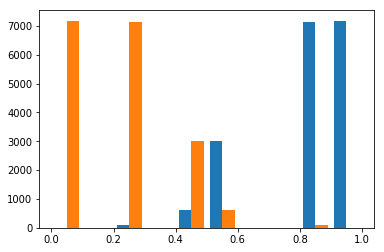

In [18]:
if hasattr( clf, 'predict_proba'):
    # predict prob
    prob = clf.predict_proba(X_test)
    plt.hist(prob)

    log_prob = clf.predict_log_proba(X_test)
    #plt.hist(log_prob)

In [ ]:
np.max(log_prob)

In [ ]:
prob.shape

In [ ]:
X_test.shape

In [ ]:
log_prob.shape

In [ ]:
plt.hist(log_prob[:,0])

In [ ]:
plt.hist(log_prob[:,1]-log_prob[:,0])

## decode after averaging over trials

In [ ]:
from P300.data import sort_by_code

XX, YY, CC= sort_by_code(X_test, Y_test, Code_test)

In [ ]:
print(XX.shape)
print(YY.shape)
print(CC.shape)

In [ ]:
# calc log prob for SVM
if type(clf) is LinearSVC: 
    log_prob = predict_log_proba_SVM(clf, XX, a, b)
log_prob = log_prob.reshape(-1,15,12)
print(log_prob.shape)    

# accumulate log_prob over trials
log_prob_diff=np.sum(log_prob,axis=1)
print(log_prob_diff.shape)


In [22]:
# calc log prob for other classifiers
if hasattr( clf, 'predict_proba'):
    #Yest=clf.predict(XX)
    #clf.score(XX, YY)
    if hasattr( clf, 'predict_log_proba'):
        log_prob = clf.predict_log_proba(XX)
    else:
        log_prob = np.log(clf.predict_proba(XX))
        
    log_prob=log_prob.reshape(-1,15,12,2)
    print(log_prob.shape)

    # accumulate log_prob over trials
    log_prob_diff=np.sum(log_prob,axis=1)[:,:,1]-np.sum(log_prob,axis=1)[:,:,0]
    print(log_prob_diff.shape)

(100, 15, 12, 2)
(100, 12)


/Users/yyoo/tf11/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/yyoo/tf11/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


In [23]:
log_prob_diff

array([[-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       ...,
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf]])

In [24]:
YY = YY.reshape(-1,15,12)
YY.shape
#YY[1,:,1]
YY_trial=YY[:,0,:]
YY_trial.shape

(100, 12)

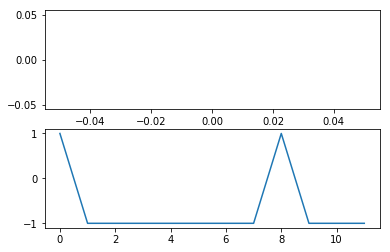

In [25]:
epoch = 0
plt.subplot(211)
plt.plot(log_prob_diff[epoch,:])
plt.subplot(212)
plt.plot(YY_trial[epoch,:])

In [26]:
np.sum(log_prob_diff > 0 , axis=1)

/Users/yyoo/tf11/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(100, 12)


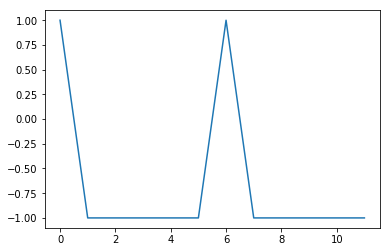

In [27]:
from P300.data import decode_rc

decoded = decode_rc(log_prob_diff)
print(decoded.shape)
plt.plot(decoded[epoch,:])

In [28]:
from P300.data import calc_accuracy_rc

calc_accuracy_rc(YY_trial, decoded)

0.03